In [10]:
import mglearn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

Text(0, 0.5, 'Признак 1')

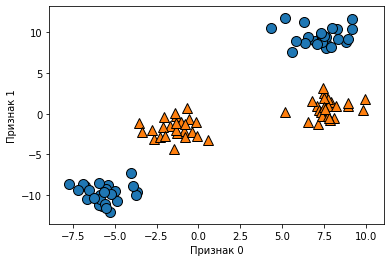

In [17]:
x, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

d:\myfiles\bstu\3rd\2nd\ai\sklearn\labs\venv\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'Признак 1')

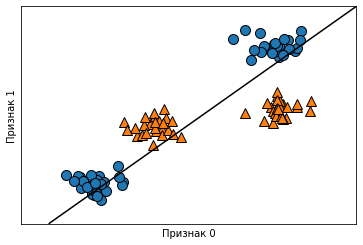

In [22]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(x, y)
mglearn.plots.plot_2d_separator(linear_svm, x)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

Text(0.5, 0, 'признак1 ** 2')

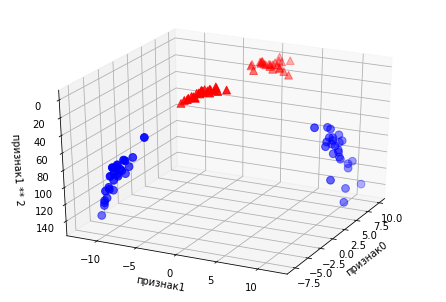

In [29]:
import numpy as np
X_new = np.hstack([x, x[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)

ax.set_xlabel("признак0") 
ax.set_ylabel("признак1") 
ax.set_zlabel("признак1 ** 2")

d:\myfiles\bstu\3rd\2nd\ai\sklearn\labs\venv\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, 'признак1 ** 2')

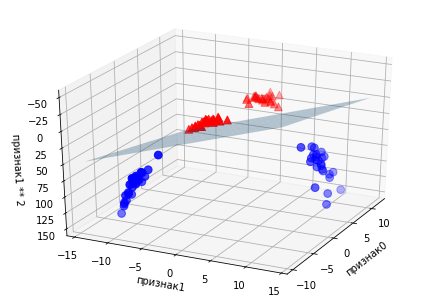

In [34]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50) 
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy) 
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)

ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)

ax.set_xlabel("признак0")
ax.set_ylabel("признак1")
ax.set_zlabel("признак1 ** 2")


Text(0, 0.5, 'Признак 1')

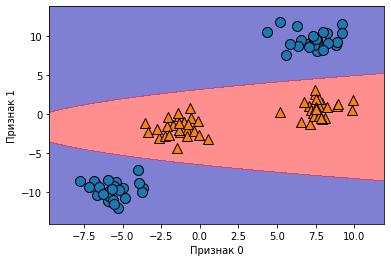

In [38]:
ZZ=YY**2

dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]) 
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
